<a href="https://colab.research.google.com/github/jantuitman/deeplearning/blob/main/Word2vec_plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install gensim
!pip install sklearn
!pip install matplotlib
!pip install ipywidgets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


In [7]:
from gensim.models import KeyedVectors

# Load the pre-trained word2vec model from a file
model = KeyedVectors.load_word2vec_format("model.bin", binary=True)

In [10]:
def vectorize_string(string):
  # Split the input string into words
  words = string.split()

  # Create a list of objects with the 'word' and 'vec' properties
  objects = [{"word": word, "vec": model[word]} for word in words if word in model]

  return objects

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

def apply_clustering(objects):
  cosine_sim = cosine_similarity([obj["vec"] for obj in objects])
  dbscan = DBSCAN(metric='precomputed', eps=0.1, min_samples=3)
  # Convert the similarity matrix to a distance matrix
  dist_matrix = 1.02 - cosine_sim / 2

  # Apply DBSCAN clustering
  dbscan = DBSCAN(metric='precomputed', eps=0.7, min_samples=2)
  clusters = dbscan.fit_predict(dist_matrix)
  print(clusters)
  for i, obj in enumerate(objects):
    obj["group"] = clusters[i]
  return objects  

In [50]:
list1 = vectorize_string("appels bananen peren bomen planten gewassen man vrouw persoon ")
list2 = apply_clustering(list1)
for i,obj in enumerate(list2):
  print(f"{obj['word']} zit in cluster {obj['group']}")

[ 0  0  0  1  1 -1  2  2 -1]
appels zit in cluster 0
bananen zit in cluster 0
peren zit in cluster 0
bomen zit in cluster 1
planten zit in cluster 1
gewassen zit in cluster -1
man zit in cluster 2
vrouw zit in cluster 2
persoon zit in cluster -1


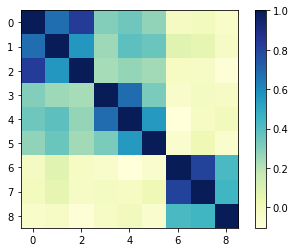

In [42]:
import matplotlib.pyplot as plt

# Compute the cosine similarity matrix
vectors = [obj["vec"] for obj in list1]
cosine_sim = cosine_similarity(vectors)

# Plot the heatmap
plt.imshow(cosine_sim, cmap='YlGnBu')
plt.colorbar()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


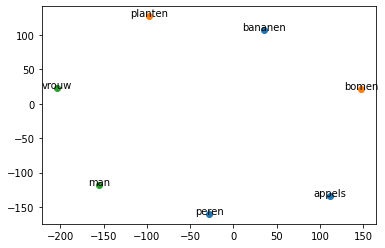

In [53]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize the t-SNE model
tsne = TSNE(n_components=2, random_state=0)

# Apply the t-SNE model to the list of vectors
vectors = [obj["vec"] for obj in list2]
reduced_vectors = tsne.fit_transform(vectors)

# Create a color map for the groups
group_map = {i: f"C{i}" for i in range(10)}

# Plot the reduced vectors with the corresponding word labels
fig, ax = plt.subplots()
for obj, vec in zip(list2, reduced_vectors):
  if obj["group"] != -1:
    ax.scatter(vec[0], vec[1], c=group_map[obj["group"]])
    ax.annotate(obj["word"], (vec[0], vec[1]), ha='center')
plt.show()

Textarea(value='', placeholder='Voer woorden in')

Button(description='Plot de woorden', style=ButtonStyle())

['auto', 'fiets', 'brommer', 'trein', 'bus', 'metro', 'hamer', 'schroevendraaier', 'knijptang', 'leeuw', 'konijn', 'mier', 'zebra', 'olifant', 'tijger', 'luipaard', 'jachtluipaard']


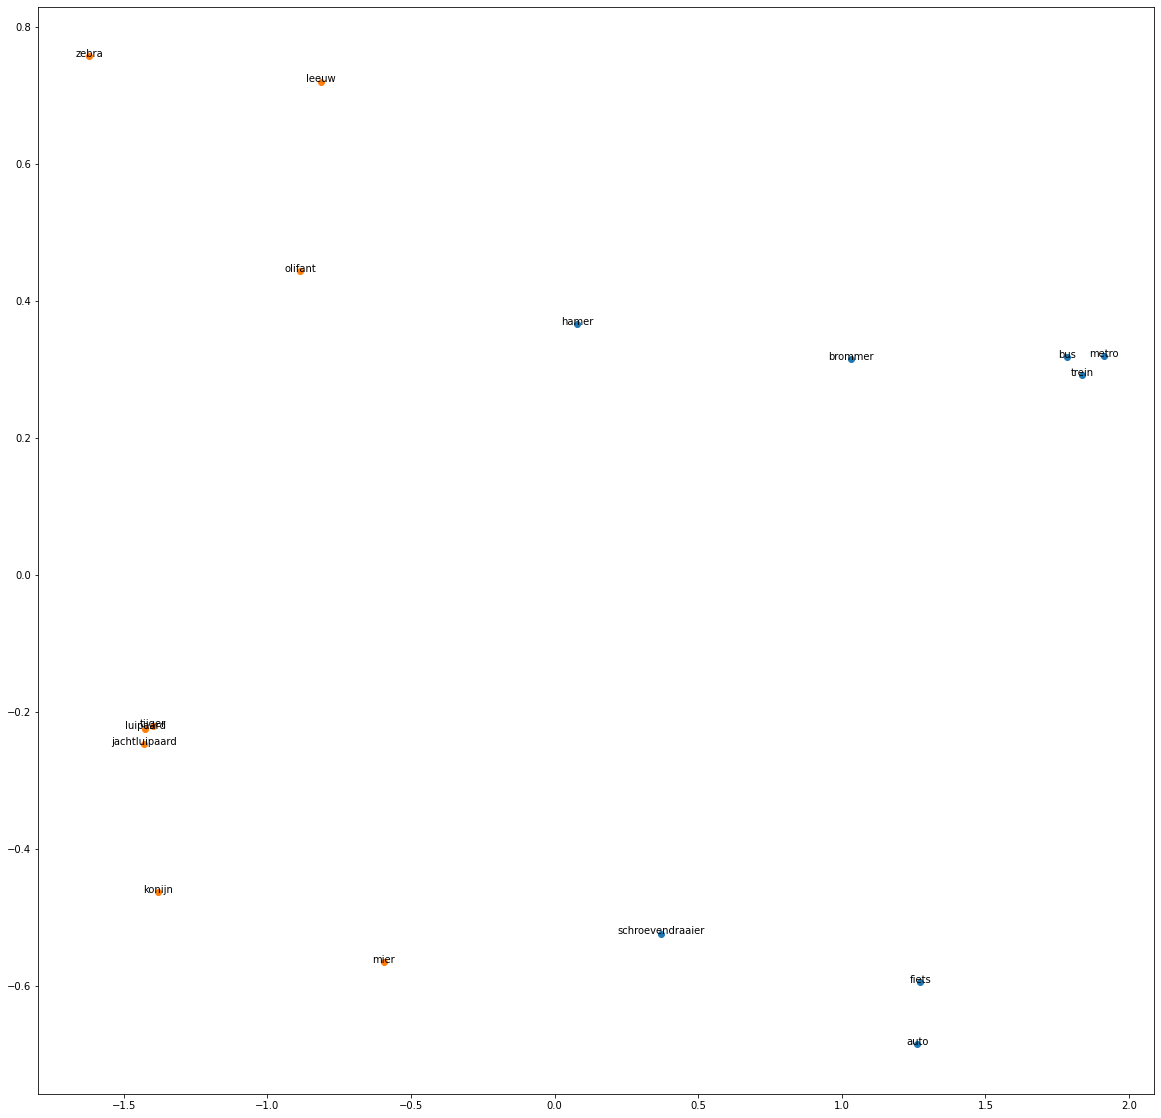

In [72]:


# Import the necessary libraries
import ipywidgets as widgets
from IPython.display import display
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

# Create a text input box
text_input = widgets.Textarea(placeholder='Voer woorden in')
display(text_input)

# Create a button
button = widgets.Button(description='Plot de woorden')
display(button)

# Define a function that runs the code when the button is clicked
def on_button_clicked(b):
    # code comes here
    widgets.Output().clear_output()

    words = text_input.value.split()
    print(words)
    objects = [{"word": word, "vec": model[word]} for word in words if word in model]
    cosine_sim = cosine_similarity([obj["vec"] for obj in objects])
    dist_matrix = 1.02 - cosine_sim / 2
    

    isomap = Isomap(n_components=2, n_neighbors=5, metric='precomputed')
    reduced_vectors = isomap.fit_transform(dist_matrix)


    # Initialize the t-SNE model
    #mds = MDS(n_components=2, dissimilarity='precomputed')
    #reduced_vectors = mds.fit_transform(cosine_sim)
    
    #tsne = TSNE(n_components=2, random_state=0)
    #reduced_vectors = tsne.fit_transform([obj["vec"] for obj in objects])
    

    dbscan = DBSCAN(metric='precomputed', eps=0.9, min_samples=3)
    clusters = dbscan.fit_predict(dist_matrix)
    # assign the 'group' property to each object
    for i, obj in enumerate(objects):
        obj["group"] = clusters[i]

    group_map = {i: f"C{i}" for i in range(len(set(clusters)) - (1 if -1 in clusters else 0))}
    fig, ax = plt.subplots(figsize=(20,20))
    for obj, vec in zip(objects, reduced_vectors):
        if obj["group"] != -1:
          ax.scatter(vec[0], vec[1], c=group_map[obj["group"]])
          ax.annotate(obj["word"], (vec[0], vec[1]), ha='center')
    plt.show()


# Attach the function to the button
button.on_click(on_button_clicked)
